In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
import random

%matplotlib inline
sns.set()

In [97]:
firstnames = [name.strip().capitalize() for name in open('firstnames.txt', 'r').readlines()]
lastnames = [name.strip().capitalize() for name in open('lastnames.txt', 'r').readlines()]

symptoms = [
    'anhedonia',
    'fatigue',
    'appetite_weight',
    'depressed_mood',
    'worthlessness_guilt',
    'suicide',
    ]

treatments = [
    'CBT',
    'SSRI',
    'SNRI',
    'ECT',
    ]

patients = []

# Generate sample patient data
id_counter = 0
for patient in range(100):
    d = {
            'patient_id': id_counter,
            'name': '{} {}'.format(random.choice(firstnames), random.choice(lastnames)),
            'age': random.randint(10,110),
            # 0 - Female
            # 1 - Male
            'gender': random.randint(0,1),
        }
    
    # 0 - Does not exhibit symptom
    # 100 - Maximum exhibition of symptom
    d.update({symptom: random.randint(0,100) for symptom in symptoms})
    
    # 0 - Treatment not effective
    # 1 - Treatment mildly effective
    # 2 - Treatment highly effective
    d.update({treatment: random.randint(0,2) for treatment in treatments})
    
    patients += [d]
    id_counter += 1

In [98]:
df = pd.DataFrame(patients)
df = df[['patient_id','name', 'age', 'gender'] + symptoms + treatments]
df.head(3)

,patient_id,name,age,gender,anhedonia,fatigue,appetite_weight,depressed_mood,worthlessness_guilt,suicide,CBT,SSRI,SNRI,ECT
0,0,Breanne Chiarotti,60,1,1,21,26,75,56,71,2,0,1,2
1,1,Jenni Bartoo,24,1,74,2,24,57,89,93,2,2,0,0
2,2,Rhianon Kort,45,0,44,5,25,95,8,70,0,2,2,2


In [99]:
def draw_radar(patient_id):
    labels = np.array(symptoms)
    stats = df.loc[patient_id, labels].values

    # Reference - https://www.kaggle.com/typewind/draw-a-radar-chart-with-python-in-a-simple-way
    angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
    # close the plot
    stats = np.concatenate((stats,[stats[0]]))
    angles = np.concatenate((angles,[angles[0]]))

    fig = plt.figure()

    ax = fig.add_subplot(111, polar=True)
    ax.plot(angles, stats, 'o-', linewidth=2)
    ax.fill(angles, stats, alpha=0.25)
    ax.set_thetagrids(angles * 180/np.pi, labels)
    ax.set_title([df.loc[patient_id,"name"]][0])
    ax.grid(True)

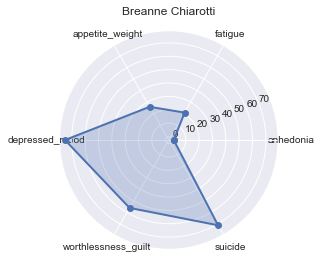

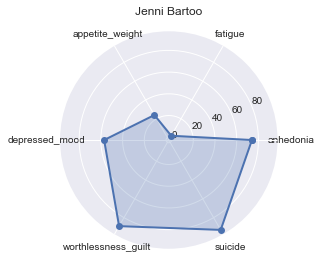

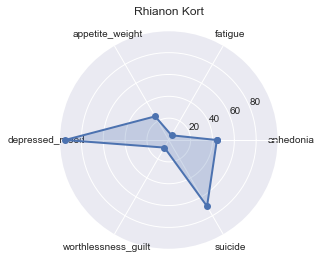

In [100]:
for patient_id in range(3): draw_radar(patient_id)